# CS105 Final Project
By: Dexter (Yiu Ming) Wong, Irene Kim, Raymond Ng, Aaron Bantay, Jenhua Chang


# Project Proposal
To begin, we are interested in exploring a dataset from Spotify that contains a little over 32,000 songs. This dataset contains metadata about each song such as their key, loudness, tempo, etc. Our main objective is to see if we can determine the genre of each song based on the various features that each song's metadata provides. We plan on using the K-Nearest Neighbors algorithm to classify/predict each song's genre.  

# Data Collection & Cleaning

# EDA

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


df = pd.read_csv("spotify_songs.csv")
df = df.iloc[:,[1,9,11,12,13,14,15,16,17,18,19,20,21,22]]
df.head()

,track_name,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Statistical Analysis
Let's start by first analyzing all of our songs at once. 

We will first begin by calculating the distribution of our data.


In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


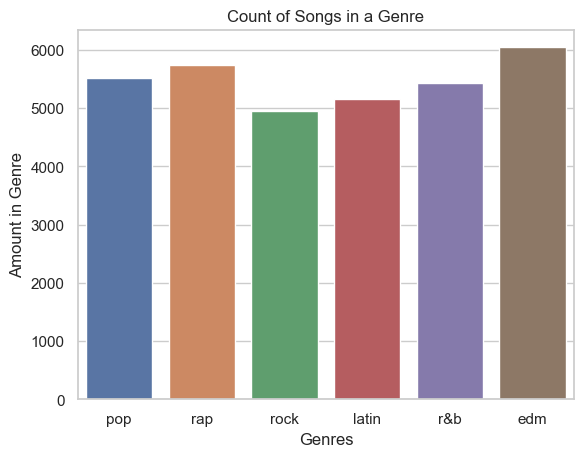

In [10]:
sns.set_theme(style="whitegrid")
songFreq = sns.countplot(x=df["playlist_genre"])

songFreq.set(xlabel='Genres',
       ylabel='Amount in Genre',
       title='Count of Songs in a Genre')

plt.show()

From the countplot shown above, we can see that out of all the genres avaiable to us within the dataset, EDM songs appear the most, while latin songs appear the least.

To garner a better understanding of each music genre, we look at each one individually and observe how the different auditory features reveal themselves. We have 6 main genres that we will be focusing on: pop, rap, rock, latin, r&b, and edm. 

We will show each feature on a bar graph.

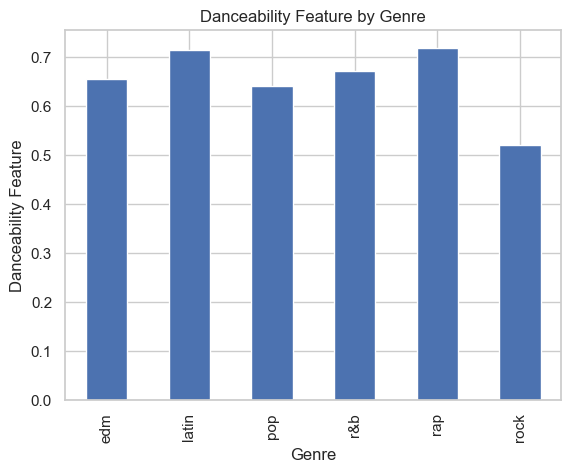

In [11]:
X = df.groupby('playlist_genre')['danceability'].mean().plot.bar()
plt.title("Danceability Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Danceability Feature")
plt.show()

The 'Danceability' feature is measured with the auditory elements- tempo, rhythm stability, beat strength, and overall regularity- and is scaled from 0.0 being the least danceable and 1.0 being most danceable.

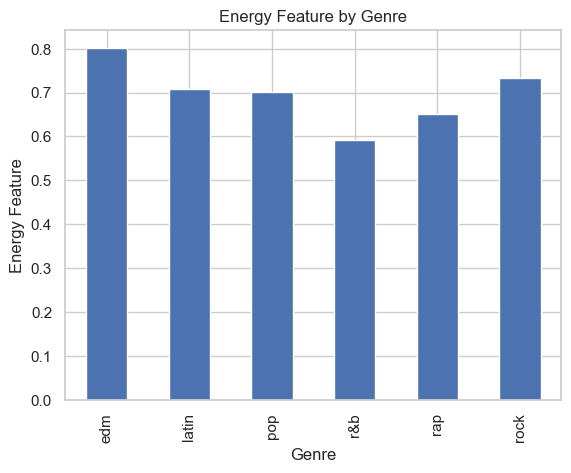

In [12]:
X = df.groupby('playlist_genre')['energy'].mean().plot.bar()
plt.title("Energy Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Energy Feature")
plt.show()

The 'Energy' feature is measured with the auditory elements- dynamic range, perceived loudness, timbre, onset rate, and general entropy. These tracks are generally characterized with fast tempos and aggressive decibal output. This feature is scaled from a score of 0.0 to 1.0 representing a attempt to quantify measures of intensity and activity.

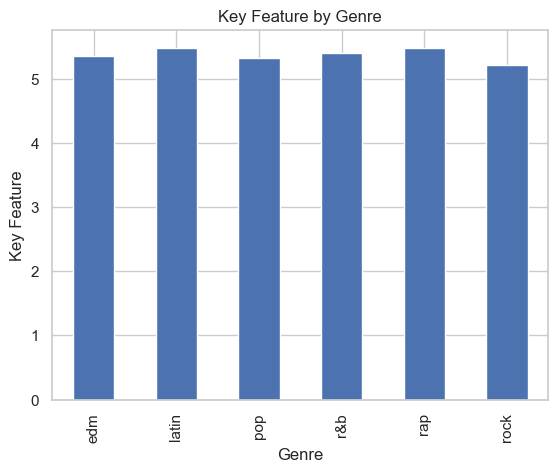

In [13]:
X = df.groupby('playlist_genre')['key'].mean().plot.bar()
plt.title("Key Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Key Feature")
plt.show()

The 'Key' feature is measured by mapping pitches to find the overall key of the track. In the case that one key is not most prominent, the value is -1.

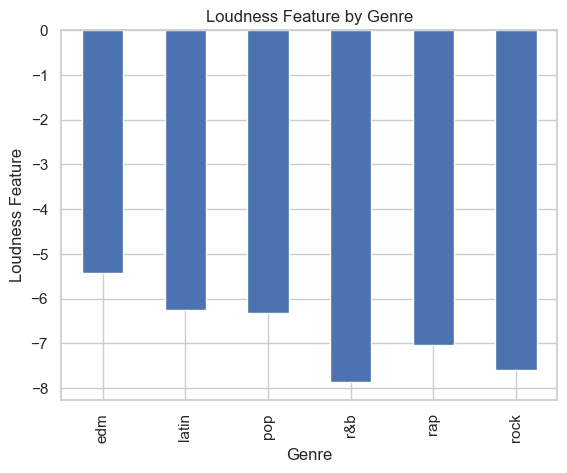

In [14]:
X = df.groupby('playlist_genre')['loudness'].mean().plot.bar()
plt.title("Loudness Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Loudness Feature")
plt.show()

The 'Loudness' feature is measured by finding the average loudness of a track in decibels, typically falling within the range from -60 and 0dB.

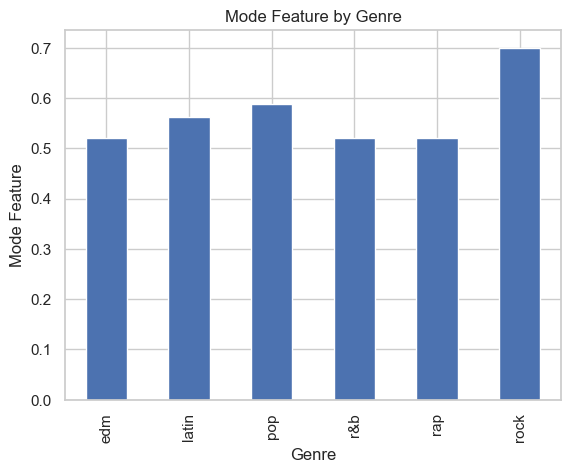

In [15]:
X = df.groupby('playlist_genre')['mode'].mean().plot.bar()
plt.title("Mode Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Mode Feature")
plt.show()

The 'Mode' feature is measured by attempting to classify the track's modality. Its identification of being either a major or a minor track gives a slight hint of the mood of the song and could be important. This feature scale system is binary- with 1 representing a Major track and 0 representing a Minor one.

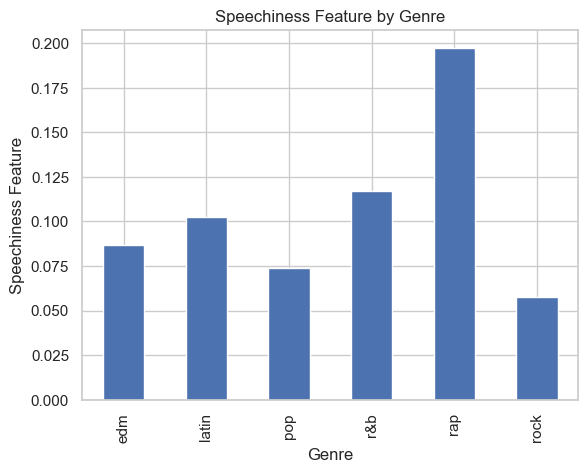

In [16]:
X = df.groupby('playlist_genre')['speechiness'].mean().plot.bar()
plt.title("Speechiness Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Speechiness Feature")
plt.show()

The 'Speechiness' feature is measured by detecting the presence of spoken words in a track. The scale goes up to 1.0 when more speech exists within the audiofile. 

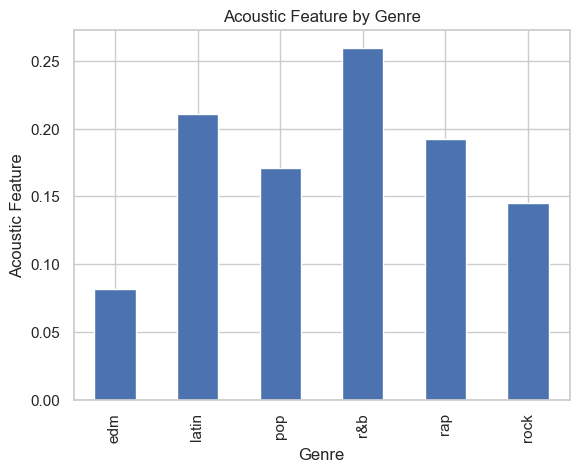

In [17]:
X = df.groupby('playlist_genre')['acousticness'].mean().plot.bar()
plt.title("Acoustic Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Acoustic Feature")
plt.show()

The 'Acousticness' feature is measured on whether the track is acoustic on a scale of 0.0 to 1.0 with the latter value representing a higher levels of acoustic features.

In [18]:
X = df.groupby('playlist_genre')['instrumentalness'].mean().plot.bar()
plt.title("Instrumentalness Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Instrumentalness Feature")
plt.show()

KeyError: 'Column not found: Instrumentalness'

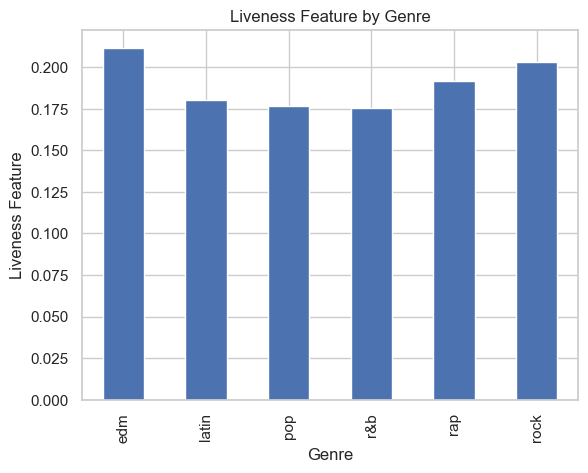

In [19]:
X = df.groupby('playlist_genre')['liveness'].mean().plot.bar()
plt.title("Liveness Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Liveness Feature")
plt.show()

In [ ]:
X = df.groupby('playlist_genre')['valence'].mean().plot.bar()
plt.title("Valence Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Valence Feature")
plt.show()

: 

In [ ]:
X = df.groupby('playlist_genre')['duration_ms'].mean().plot.bar()
plt.title("Duration Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Duration Feature")
plt.show()

: 

In [ ]:

X = df.groupby('playlist_genre')['tempo'].mean().plot.bar()
plt.title("Tempo Feature by Genre")
plt.xlabel("Genre")
plt.ylabel("Tempo Feature")
plt.show()

: 

: 

Based on this distribution, we can see that the songs have a wide range of each feature.

Let's focus on the tempo for each song for now. 

In [ ]:
plt.figure(figsize=(8, 6))
df['tempo'].plot(kind='hist')

# Add a title and labels for the x and y axes
plt.title('Distribution of Tempo Values')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


: 

We can see that the vast majority of songs will have a tempo of 100 - 150 BPM. The outliers will have a slow tempo that bottoms out at around 50 BPM and the highest will be around 240. 

Next, we can look at speechiness and see if there is anything of interest there.

In [ ]:
# Create the scatterplot
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df.index, y='speechiness', data=df)

# Add a title and labels for the x and y axes
plt.title('Distribution of Speechiness Values')
plt.xlabel('Index')
plt.ylabel('Speechiness')
# Show the plot
plt.show()

: 

Interestingly enough there is a sharp drop off in speechiness shortly after the 10,000th song. Otherwise, it seems that most songs will have a speechiness of around 0.4 or lower. 

Maybe we will see something if compare the speechiness and the tempo metrics.

In [ ]:
# Create the Smooth Kernel Density plot with marginal histograms
plt.figure(figsize=(15, 8))

sns.set_theme(style="white")
g = sns.jointplot(x='speechiness', y='tempo', data=df, kind='kde')
g.fig.set_facecolor('white')

# Add a title
plt.title('Distribution of Speechiness and Tempo Values')
g.plot_joint(sns.kdeplot,
             fill=True,
             shade=True,
             thresh=0, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

# Show the plot
plt.show()

: 

In [ ]:

# If the dataset does not have a "playlist_genre" column, create one
if "playlist_genre" not in df.columns:
    df["playlist_genre"] = "unknown"

# Select the speechiness and tempo columns as our features
X = df[["speechiness", "tempo"]]

# Define the target variable (the column we want to predict)
y = df["playlist_genre"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

: 

NOTE: THIS CODE IS JUST ME PLAYING AROUND TESTING WHICH FEATURES WORK BEST 


This code tests the "speechiness" and "tempo" features using KNN to predict the genre of the song. The output is the accuracy of these two features predictions compared to what is the song's actual genre.